In [2]:
pip install pandas matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37,873
               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


/var/folders/_w/4_2nwf4s5734fchdsxq8_2cm0000gn/T/ipykernel_98806/292552375.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_summary.index, y=region_summary['Sales'], palette='viridis')


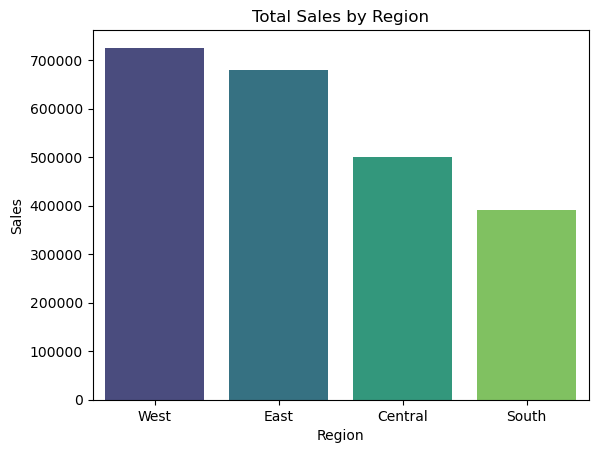

                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203412.7330  30221.7633
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Paper          78479.2060  34053.5693
Supplies       46673.5380  -1189.0995
Art            27118.7920   6527.7870
Envelopes      16476.4020   6964.1767
Labels         12486.3120   5546.2540
Fasteners       3024.2800    949.5182


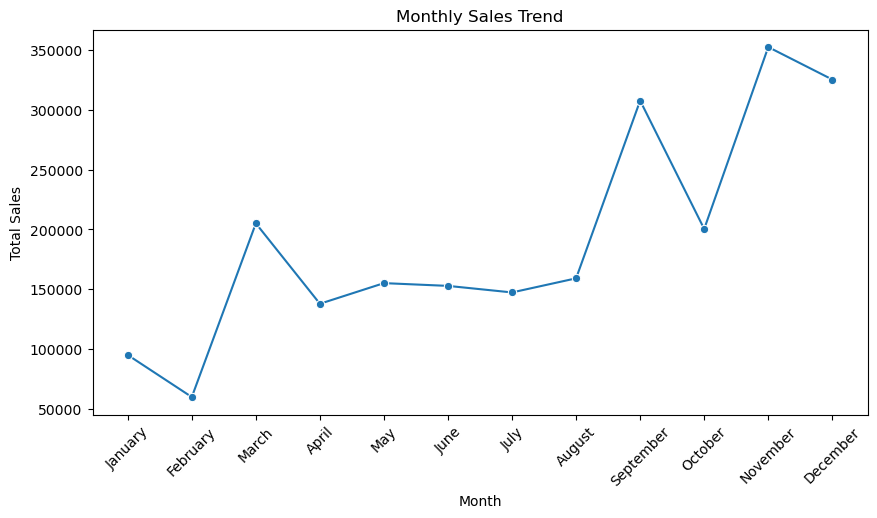

Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64


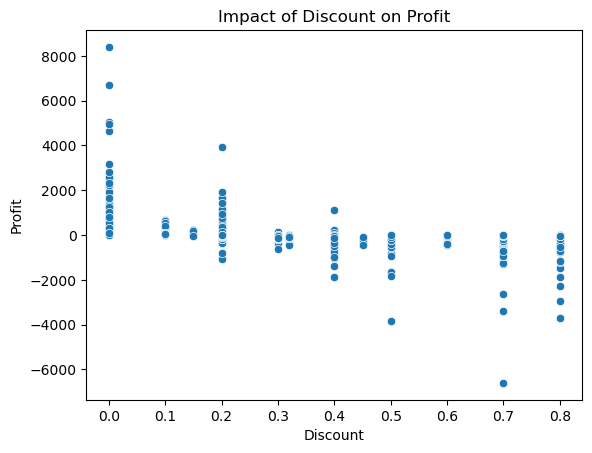

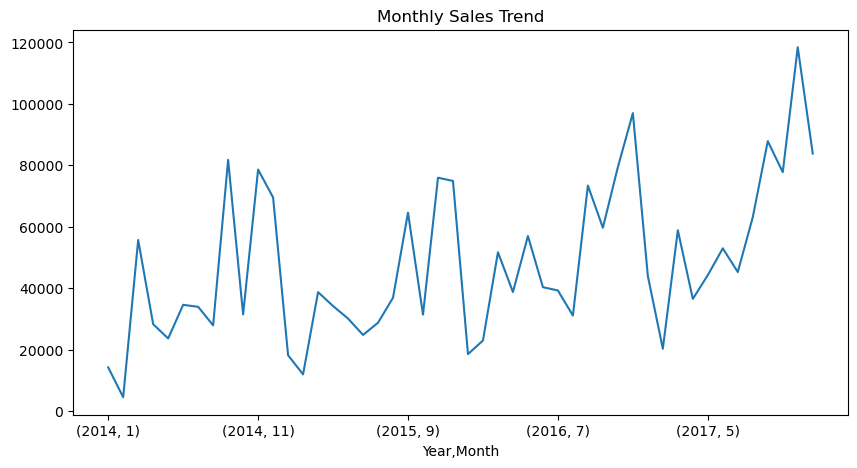

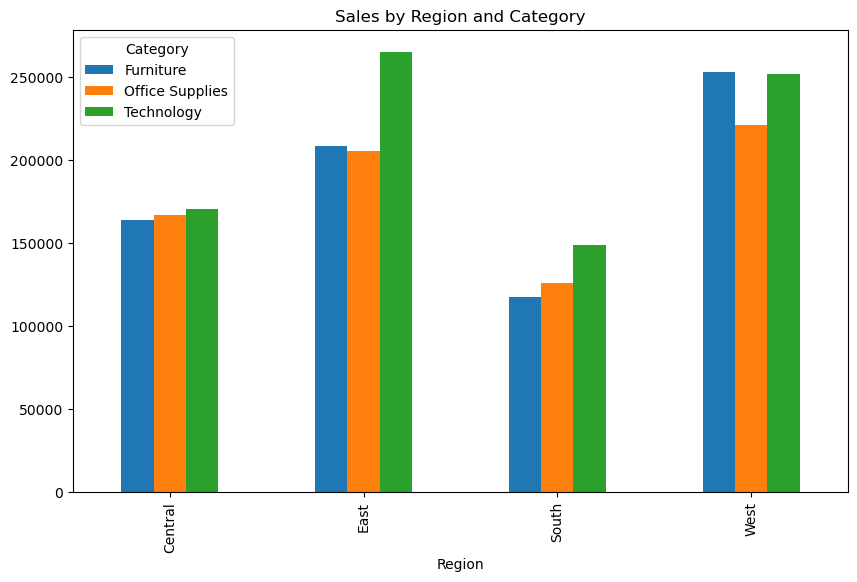

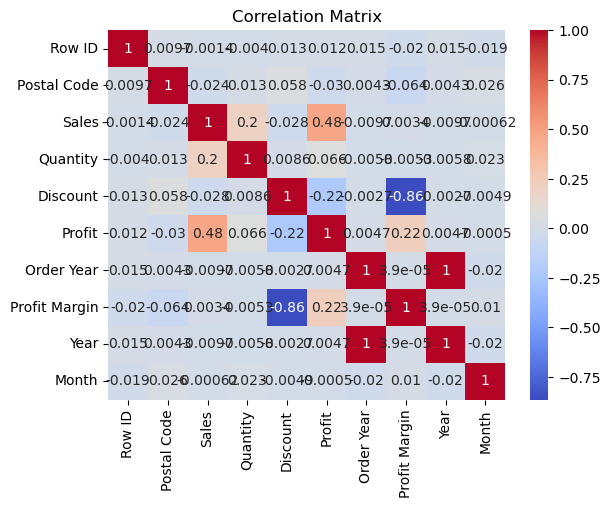

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('/Users/siddharthbhatt/Desktop/sales_analysis_dashboard/SampleSuperstore.csv', encoding='unicode_escape', engine='python')

df.head()

df.isnull().sum()

df.duplicated().sum()

# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month names
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()

df[['Order Date', 'Order Year', 'Order Month']].head()

# Basic KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity:,}")


region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(region_summary)

sns.barplot(x=region_summary.index, y=region_summary['Sales'], palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

subcat_summary = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(subcat_summary)

# Create a Month order so charts appear chronologically
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_sales = df.groupby('Order Month')['Sales'].sum().reindex(month_order)

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

margin_by_cat = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)
print(margin_by_cat)



# Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Impact of Discount on Profit')
plt.show()

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')
plt.show()

region_cat = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()
region_cat.plot(kind='bar', figsize=(10,6), title='Sales by Region and Category')
plt.show()


corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


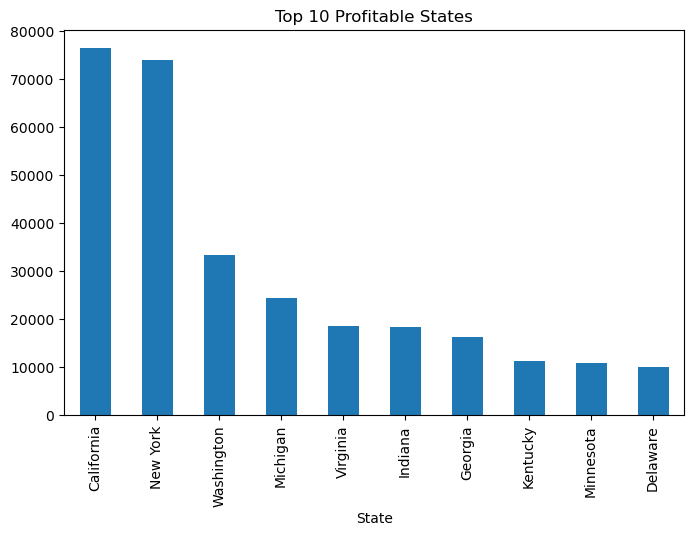

In [4]:
# Top 10 profitable states
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(8,5), title='Top 10 Profitable States')
plt.show()

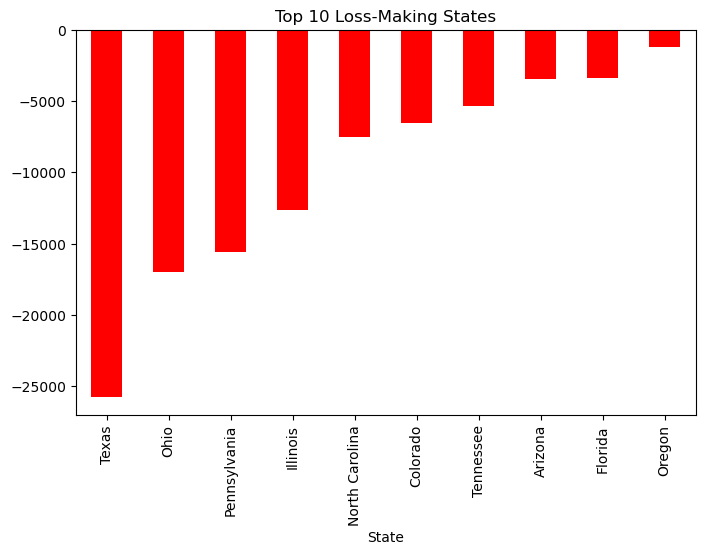

In [5]:
# Most loss making states
loss_states = df.groupby('State')['Profit'].sum().sort_values().head(10)
loss_states.plot(kind='bar', color='red', figsize=(8,5), title='Top 10 Loss-Making States')
plt.show()


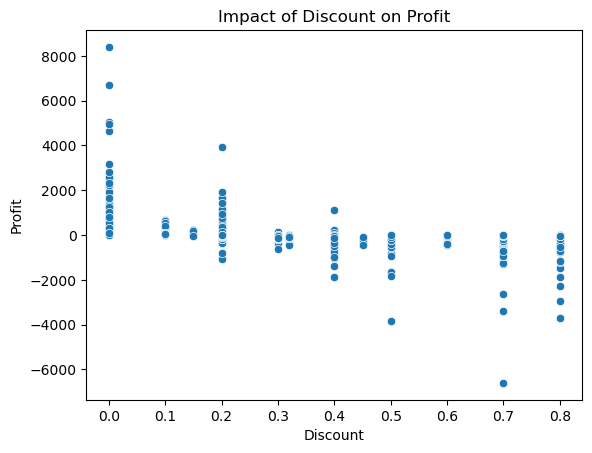

In [9]:
# Progfit vs Discount
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Impact of Discount on Profit')
plt.show()


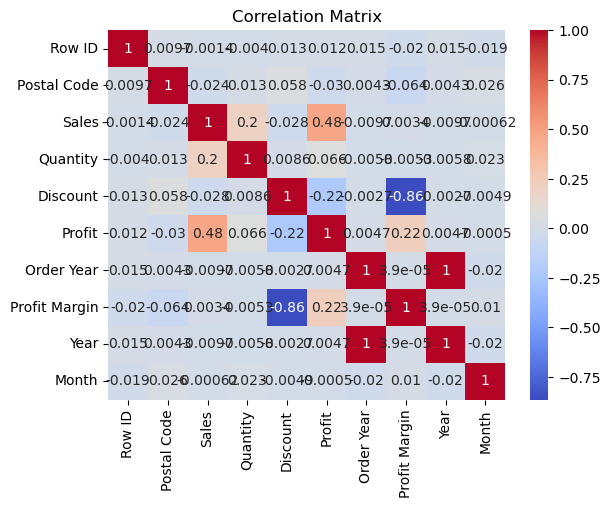

In [6]:

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Key Insights from Sales Performance Analysis

- **Regional Sales:** The **West region** recorded the highest sales, followed by East and Central.
- **Top Profitable State:** **California** contributed the most to overall profit.
- **Loss-Making State:** **Texas** showed consistent losses, mainly in furniture and tables.
- **Discount vs Profit:** High discounts negatively impact profit — strong negative correlation.
- **Category Performance:** 
  - **Technology** products yield the highest profit margins.
  - **Furniture** has low margins and occasional losses.
- **Sub-Category Insights:**
  - **Phones** and **Copiers** generate high profits.
  - **Tables** and **Supplies** show negative profits despite good sales.


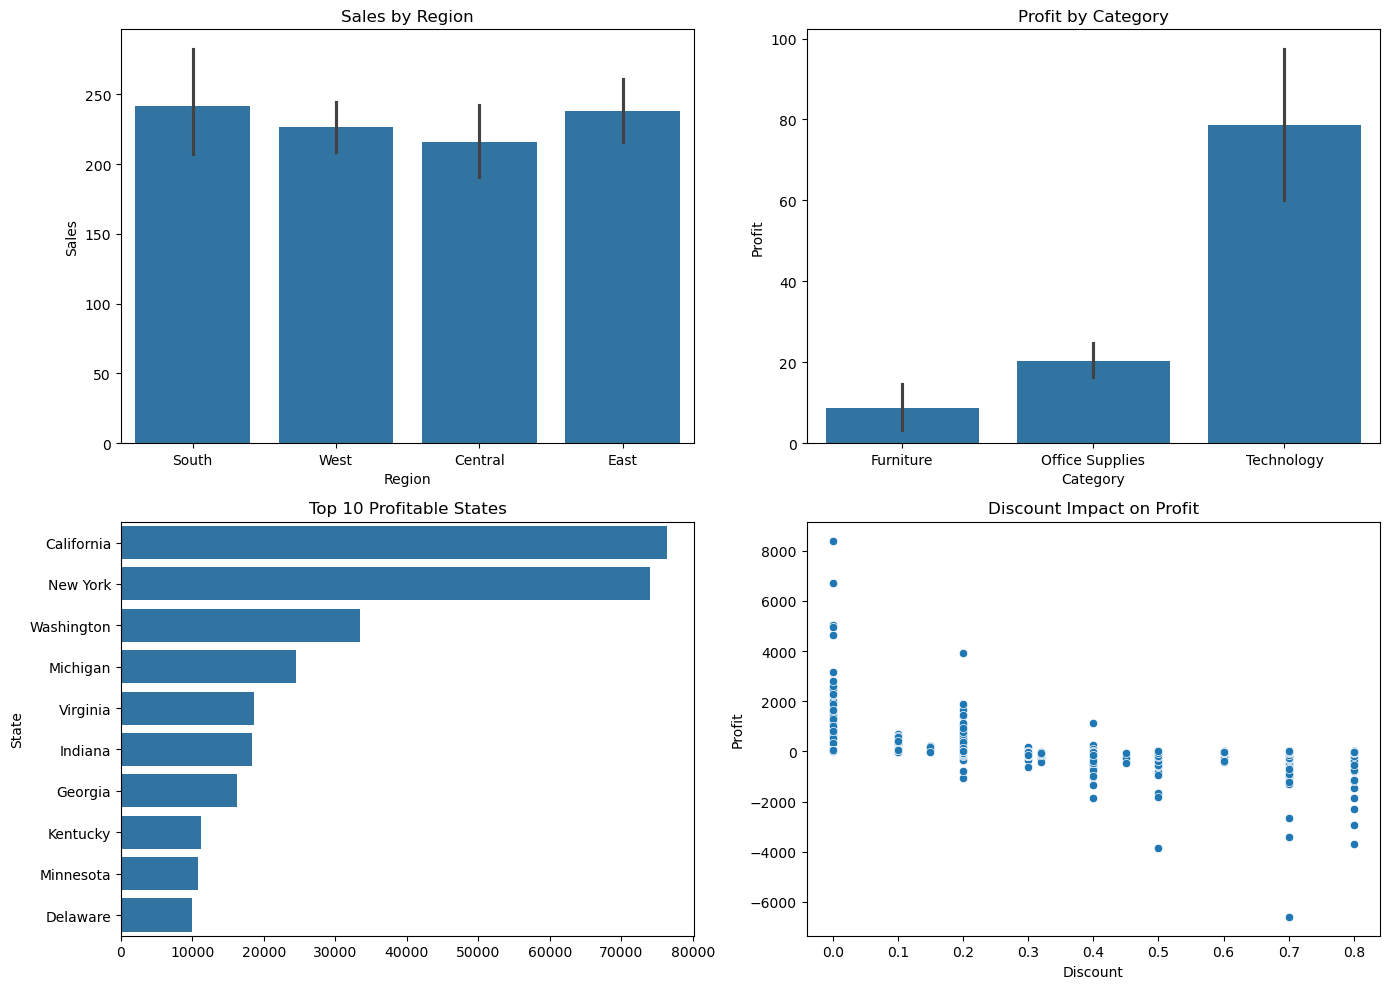

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sales by Region
sns.barplot(x='Region', y='Sales', data=df, ax=ax[0,0])
ax[0,0].set_title('Sales by Region')

# 2. Profit by Category
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0,1])
ax[0,1].set_title('Profit by Category')

# 3. Top 10 Profitable States
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, ax=ax[1,0])
ax[1,0].set_title('Top 10 Profitable States')

# 4. Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=df, ax=ax[1,1])
ax[1,1].set_title('Discount Impact on Profit')

plt.tight_layout()
plt.show()


In [14]:
df.to_csv('cleaned_sales_data.csv', index=False)
